# Explore gradient descent

### Gradient Descent
Gradient descent is a method to find the minimum of a function. In our case, we want to minimize the MSE. The idea is to start with some initial values for our parameters (like $\theta_0, \theta_1, \ldots$) and iteratively adjust them to reduce the MSE.


### Mean Squared Error (MSE)
The Mean Squared Error measures how far our predictions ($\hat{y}_i$) are from the actual values ($y_i$). The formula is:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$


### Steps of Gradient Descent
1. **Initialize Parameters**: Start with initial guesses for $$\theta_0, \theta_1, \ldots$$.
2. **Compute Predictions**: Calculate the predicted values $$\hat{y}_i$$ using the current parameters.
3. **Calculate Gradient**: Compute the gradient (slope) of the MSE with respect to each parameter.
4. **Update Parameters**: Adjust the parameters in the direction that reduces the MSE.




### Gradient Calculation
The gradient of the MSE with respect to a parameter $$\theta_j$$ is:

$$
\frac{\partial \text{MSE}}{\partial \theta_j} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) x_{ij}
$$

where $x_{ij}$ is the value of the $j$-th feature for the $i$-th data point.

### Update Rule
Using the gradient, we update each parameter $$\theta_j$$ as follows:

$$
\theta_j := \theta_j - \alpha \left( -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) x_{ij} \right)
$$

Simplifying, we get:

$$
\theta_j := \theta_j + \alpha \frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) x_{ij}
$$

Here, $$\alpha$$ is the learning rate, which controls how big the steps are in each iteration.

### Summary
1. **Start with initial parameters**.
2. **Calculate predictions**.
3. **Compute the gradient**.
4. **Update the parameters** using the gradient.

Repeat these steps until the MSE is minimized.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Mean Squared Error (MSE) Formula

The Mean Squared Error (MSE) is a measure of the average squared difference between the actual and predicted values. It is calculated as follows:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:
- $n$ is the number of data points
- $y_i$ is the actual value
- $\hat{y}_i$ is the predicted value


In [2]:
# yhat = wx + b
# loss = (y-yhat)**2 / N

In [3]:
# Initialise some parameters
x = np.random.randn(100,1)
x

array([[ 1.18511439],
       [-1.58441621],
       [ 0.71422047],
       [-0.4143893 ],
       [-1.36378575],
       [ 0.64273799],
       [-1.03402145],
       [ 0.29605863],
       [ 0.11649656],
       [ 0.81644816],
       [-1.1926118 ],
       [-0.23420855],
       [-0.95665971],
       [-0.28633474],
       [-0.56973505],
       [-2.6066039 ],
       [ 0.49611244],
       [ 1.69841381],
       [ 0.81115429],
       [-0.70446647],
       [ 1.78787715],
       [-0.59408974],
       [ 1.08332122],
       [-0.52673506],
       [-0.26179797],
       [ 0.49200702],
       [ 0.5665113 ],
       [ 1.34531869],
       [ 1.76315048],
       [-0.67942689],
       [ 1.02693948],
       [ 1.63632659],
       [ 1.32360145],
       [-0.02905627],
       [ 0.07662312],
       [ 1.59056296],
       [-0.22014995],
       [ 0.19932764],
       [-1.32803195],
       [-0.48320905],
       [ 0.70268286],
       [ 0.14144926],
       [-0.80616971],
       [-1.88797555],
       [ 1.47753283],
       [ 0

In [4]:
# Initialise some parameters
b_actual = np.random.rand()
w_actual = 2
print(f"Actual Bias is: {b_actual}")
print(f"Actual weight is: {w_actual}")
y = w_actual*x + b_actual

Actual Bias is: 0.11057298832684359
Actual weight is: 2


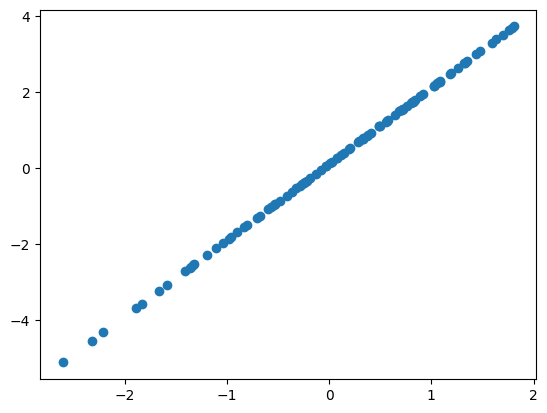

In [5]:
plt.scatter(x,y)

In [6]:
# Parameters to find:
weight = 0.0
bias = 0.0

# Hyperparameters
learning_rate = 0.01

The `descend` function updates the weight (`w`) and bias (`b`) in a linear regression model using gradient descent. It calculates the gradients of the loss function with respect to `w` and `b` from the input features (`x`) and target values (`y`), then adjusts `w` and `b` by subtracting the product of the learning rate and the average gradient, aiming to minimize the mean squared error loss.

In [7]:
# Create gradient descent function
def descend(x, y, w, b, learning_rate):
    dldw = 0.0  # Initialize gradient for weight
    dldb = 0.0  # Initialize gradient for bias
    N = x.shape[0]  # Number of data points
    # loss = (y-(wx+b))**2  # Loss function (commented out)
    for xi, yi in zip(x, y):
        dldw += -2*xi*(yi-(w*xi+b))  # Accumulate gradient for weight
        dldb += -2*(yi-(w*xi+b))  # Accumulate gradient for bias
        
    # Make an Update to the w parameter
    w = w - learning_rate * (1/N) * dldw  # Update weight
    b = b - learning_rate * (1/N) * dldb  # Update bias
    
    return w, b  # Return updated parameters


In [8]:
print(f"Actual weight is: {w_actual} | Actual Bias is: {b_actual}")
print('----------')
# Iteratively make Updates
for epoch in range(400):  # Loop over 400 epochs
    # Run gradient descent
    weight, bias = descend(x, y, weight, bias, learning_rate)  # Update weight and bias
    yhat = weight*x + bias  # Calculate predictions
    N = x.shape[0]  # Number of Samples
    loss = np.divide(np.sum((y-yhat)**2, axis=0), N)  # Compute mean squared error loss
    if epoch % 50 == 0:  # Every 50 epochs
        print(f"For epoch {epoch} -> loss is: {loss}, parameters-> weight:{weight}, bias: {bias}")  # Print loss and parameters

Actual weight is: 2 | Actual Bias is: 0.11057298832684359
----------
For epoch 0 -> loss is: [3.94917023], parameters-> weight:[0.04081587], bias: [0.00665923]
For epoch 50 -> loss is: [0.49693514], parameters-> weight:[1.29663341], bias: [0.15303468]
For epoch 100 -> loss is: [0.0658114], parameters-> weight:[1.74420516], bias: [0.15504873]
For epoch 150 -> loss is: [0.00916088], parameters-> weight:[1.90578097], bias: [0.13738719]
For epoch 200 -> loss is: [0.00133258], parameters-> weight:[1.96486666], bias: [0.12427261]
For epoch 250 -> loss is: [0.00020088], parameters-> weight:[1.98674699], bias: [0.11703766]
For epoch 300 -> loss is: [3.11092083e-05], parameters-> weight:[1.99494738], bias: [0.11348685]
For epoch 350 -> loss is: [4.91123954e-06], parameters-> weight:[1.99805525], bias: [0.11184851]
